Generating a dataset with 2 values and an outcome in 0 and 1.

E.g. X = [[1,2], [2,3], [3,4]]
Y = [1,0,1,0,1]

In [41]:
from sklearn.datasets import make_classification
import numpy as np

X, y = make_classification(
    n_samples=100,
    n_features=2,
    n_informative=1,
    n_redundant=0,
    n_classes=2,
    n_clusters_per_class=1,
    random_state=41,
    hypercube=False,
    class_sep=10,
)

In [42]:
import matplotlib.pyplot as plt

Here we are plotting the generated dataset.

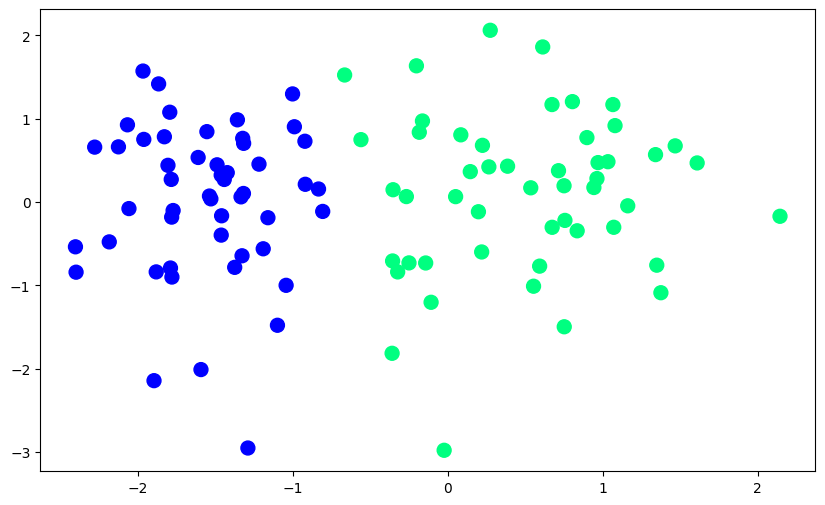

In [43]:
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="winter", s=100)

In [44]:
def step(z):
    return 1 if z > 0 else 0

In [45]:
def perceptron(X, y):
    X = np.insert(X, 0, 1, axis=1) # Inserts 1 infront of every row of data
    # E.g.: [2,3] => [1,2,3]
    # [0.2, 3.1] => [1, 0.2, 3.1]
    weights = np.ones(X.shape[1]) # Generates initial weights of shape of X
    # E.g. weights [1,1,1] if X.shape = 3
    lr = 0.1 # Specifies the learning rate

    for i in range(1000):
        # Choose a random number from 0 to 100
        # Because we have 100 data
        j = np.random.randint(0, 100) 

        # We are performing the dot product of the randomly
        # selected data and  the initial weights
        # E.g. Data = [1,4,5] and weights = [1,1,1]
        # Result = 1*1+4*1+5*1 = 10
        # Now we pass this 10 to the step function
        # This returns 1 if number > 0 else returns 0
        # So for this case y_hat = 1
        y_hat = step(np.dot(X[j], weights)) 

        # Now we are applying the formula 
        # Formula = wn = wo + lr *(actual_outcome - outcome predicted by model) 
        # * randomly selected data
        weights = weights + lr * (y[j] - y_hat) * X[j]
    
    # Returning the intercept(coordinates) and the coefficient values
    return weights[0], weights[1:]

In [46]:
intercept_, coef_ = perceptron(X, y)

In [47]:
print(intercept_)
print(coef_)

0.9
[1.44742924 0.11074091]


In [48]:
# Calculating m because m = -(A/B)
m = -(coef_[0] / coef_[1])

# Calculating b because b = -(C/B)
b = -(intercept_ / coef_[1])

In [49]:
# Finding out the equation of the line
x_input = np.linspace(-3, 3, 100)
y_input = m*x_input + b

(-3.0, 2.0)

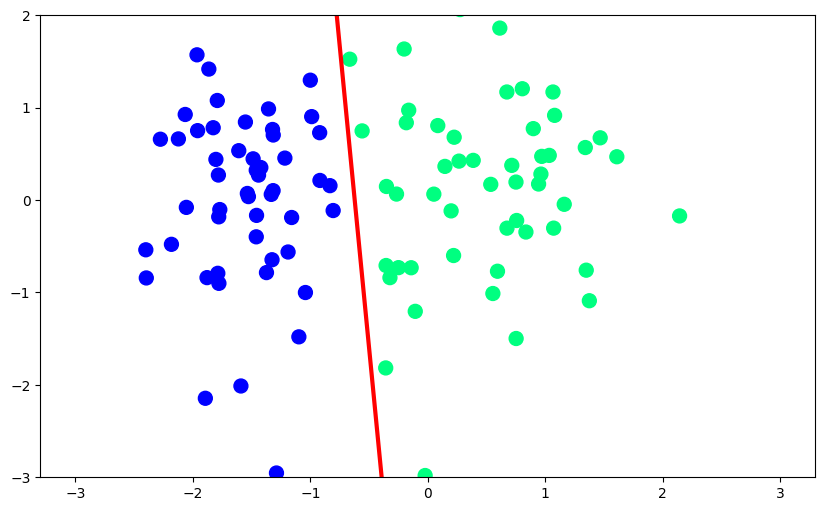

In [50]:
# Plotting the initial data and the line
plt.figure(figsize=(10,6))
plt.plot(x_input, y_input, color="red", linewidth=3)
plt.scatter(X[:,0], X[:,1], c=y, cmap="winter", s=100)
plt.ylim(-3, 2)